In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import redditutils as ru
import word2vecReader as wvr
import pickle

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

from skopt import BayesSearchCV


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
!ls *.csv

cleaned_shower.csv shower_clean.csv   tokenized.csv
cleaning.csv       showerthoughts.csv train.csv
results.csv        test.csv           vectorized_df.csv


In [23]:
df = pd.read_csv('shower_clean.csv', index_col = 0)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000005 entries, 0 to 999999
Data columns (total 7 columns):
title           988627 non-null object
score           1000000 non-null float64
id              1000000 non-null object
created_utc     1000000 non-null object
selftext        591622 non-null object
num_comments    999996 non-null float64
quality         1000005 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 61.0+ MB


In [26]:
X = df['title']
y = df['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2325)

In [ ]:
X_train_short = X_train[:100000]
y_train_short = y_train[:100000]

In [56]:
response = y_train_short

In [41]:
features.shape

(100000, 400)

In [40]:
response.shape

(100000,)

In [62]:
def remove_bad_indices(features, response):
    # Remove document-response pairs that failed to be embedded in vector space
    bad_indices = np.unique(np.where(np.isnan(features))[0])
    
    
    features = np.delete(features, bad_indices, axis=0)
    response = np.delete(np.array(response), bad_indices)

In [53]:
bad_indices = np.unique(np.where(np.isnan(features))[0])

In [64]:
response = np.delete(np.array(response), bad_indices)

In [65]:
features = np.delete(features, bad_indices, axis=0)

In [17]:
features = pickle.load(open('100k_train.pkl', 'rb'))

In [9]:
features_res, response_res = ru.upsample(features, response)

In [67]:
features.shape

(99981, 400)

In [68]:
response.shape

(99981,)

In [77]:
rfc = RandomForestClassifier(n_estimators = 100)

imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
new_feat = imp.fit_transform(feat)

scores = cross_val_score(rfc, new_feat, resp, cv=3, scoring='roc_auc')

print(scores)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.50368999 0.500919   0.500364  ]


In [ ]:
rfc.score()

In [69]:
feat = pickle.load(open('100k_train.pkl', 'rb'))

In [71]:
feat.shape

(100000, 400)

In [72]:
resp = np.array(y_train_short)

In [73]:
resp.shape

(100000,)

## Clustering

In [78]:
features = pickle.load(open('100k_train.pkl', 'rb'))
response = pickle.load(open('100k_response.pkl', 'rb'))

In [81]:
imp = Imputer(missing_values='NaN', strategy = 'mean', axis=0)
imputed_features = imp.fit_transform(features)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
nb = GaussianNB()

No upsampling.

In [ ]:
vanilla_scores = cross_val_score(nb, imputed_features, response)

In [86]:
upsample_features, upsample_response = ru.upsample(imputed_features, response)

In [90]:
scores = cross_val_score(nb, upsample_features, upsample_response, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [91]:
print(scores)
print(np.mean(scores))

0.5651783426419094

## Gradient Boosting

In [92]:
gb = GradientBoostingClassifier()

gb_scores = cross_val_score(gb, upsample_features, upsample_response, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [93]:
print(gb_scores)
print(np.mean(gb_scores))

[0.55001623 0.55395952 0.61917295]
0.5743828970583761


## Adaboost

In [98]:
ab = AdaBoostClassifier()

ab_scores = cross_val_score(ab, upsample_features, upsample_response, scoring='roc_auc', cv=3)

In [99]:
ab_scores

array([0.53879009, 0.54511796, 0.57572753])

## SVM

In [ ]:
svc = svc()

svc_scores = cross_val_score(svc, upsample_features, upsample_response, scoring='roc_auc', cv=3)

## Logistic Regression

In [95]:
logit = LogisticRegression()

lr_scores = cross_val_score(logit, upsample_features, upsample_response, scoring='roc_auc')

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
lr_scores

array([0.52886107, 0.52361202, 0.53339104])

## KNN

In [102]:
knn = KNeighborsClassifier()

knn_scores = cross_val_score(knn, upsample_features, upsample_response, cv=3, scoring='roc_auc')

KeyboardInterrupt: 

In [ ]:
knn_scores

## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)

rfc_scores = cross_val_score(knn, upsample_features, upsample_response, cv=3, scoring='roc_auc')

## Final model

In [103]:
!ls *.pkl

100k_response.pkl     bayes_search.pkl      fitted_lda_short.pkl
100k_train.pkl        final_model.pkl       fixed_100k_train.pkl
1k_features.pkl       first_5k_response.pkl random_forest.pkl
1k_response.pkl       first_5k_words.pkl    w2v_mod.pkl
25k_test.pkl          fitted_cv.pkl         word2vec_mod.pkl


In [104]:
gb = pickle.load(open('final_model.pkl', 'rb'))

In [107]:
features = pickle.load(open('fixed_100k_train.pkl', 'rb'))

In [110]:
response = pickle.load(open('100k_response.pkl', 'rb'))

In [111]:
response.shape

(100000,)

In [109]:
features.shape

(100000, 400)

In [112]:
new_features, new_response = ru.remove_bad_indices(features, response)

In [115]:
predictions = gb.predict(new_features)

## BELOW IS ALL ON TRAINING DATA, USE CODE FOR TEST DATA BUT DON'T INCLUDE THIS PLOT IN PRESENTATION

In [121]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: name 'model' is not defined

In [123]:
probs = gb.predict_proba(new_features)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(new_response, preds)
roc_auc = auc(fpr, tpr)

In [126]:
import matplotlib as mpl

In [127]:
mpl.rcParams['figure.dpi'] = 300

In [ ]:
l = np.linspace(0, 1, 100)

plt.figure(figsize=(7, 5))
plt.plot([.09], [.91], marker='o', markersize=5, color="black")
plt.plot(fpr, tpr, color='purple', alpha=0.5, label='Random forest model')
plt.plot(l, l, color='green', alpha=0.5, label='Random guessing')
plt.xlabel('False positive rate', size=10)
plt.ylabel('True positive rate', size=10, rotation=0)
plt.title('.91 True Positive Rate at .50 Threshold', size=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_label_coords(-0.05,1.02)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate('.50 threshold', xy=(.09, .91), xytext=(.3, .8),
            arrowprops=dict(facecolor='black', shrink=0.05, width=3),
            )

plt.legend(loc=5)

In [139]:
!ls *.pkl

100k_response.pkl     final_model.pkl       preds.pkl
100k_train.pkl        first_5k_response.pkl random_forest.pkl
1k_features.pkl       first_5k_words.pkl    truth.pkl
1k_response.pkl       fitted_cv.pkl         w2v_mod.pkl
25k_test.pkl          fitted_lda_short.pkl  word2vec_mod.pkl
25k_test_features.pkl fixed_100k_train.pkl
bayes_search.pkl      new_feat.pkl


In [138]:
preds = pickle.load(open('preds.pkl', 'rb'))
truth = pickle.load(open('truth.pkl', 'rb'))

In [140]:
new_features = pickle.load(open('new_feat.pkl', 'rb'))

In [141]:
probs = gb.predict_proba(new_features)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(truth, preds)
roc_auc = auc(fpr, tpr)

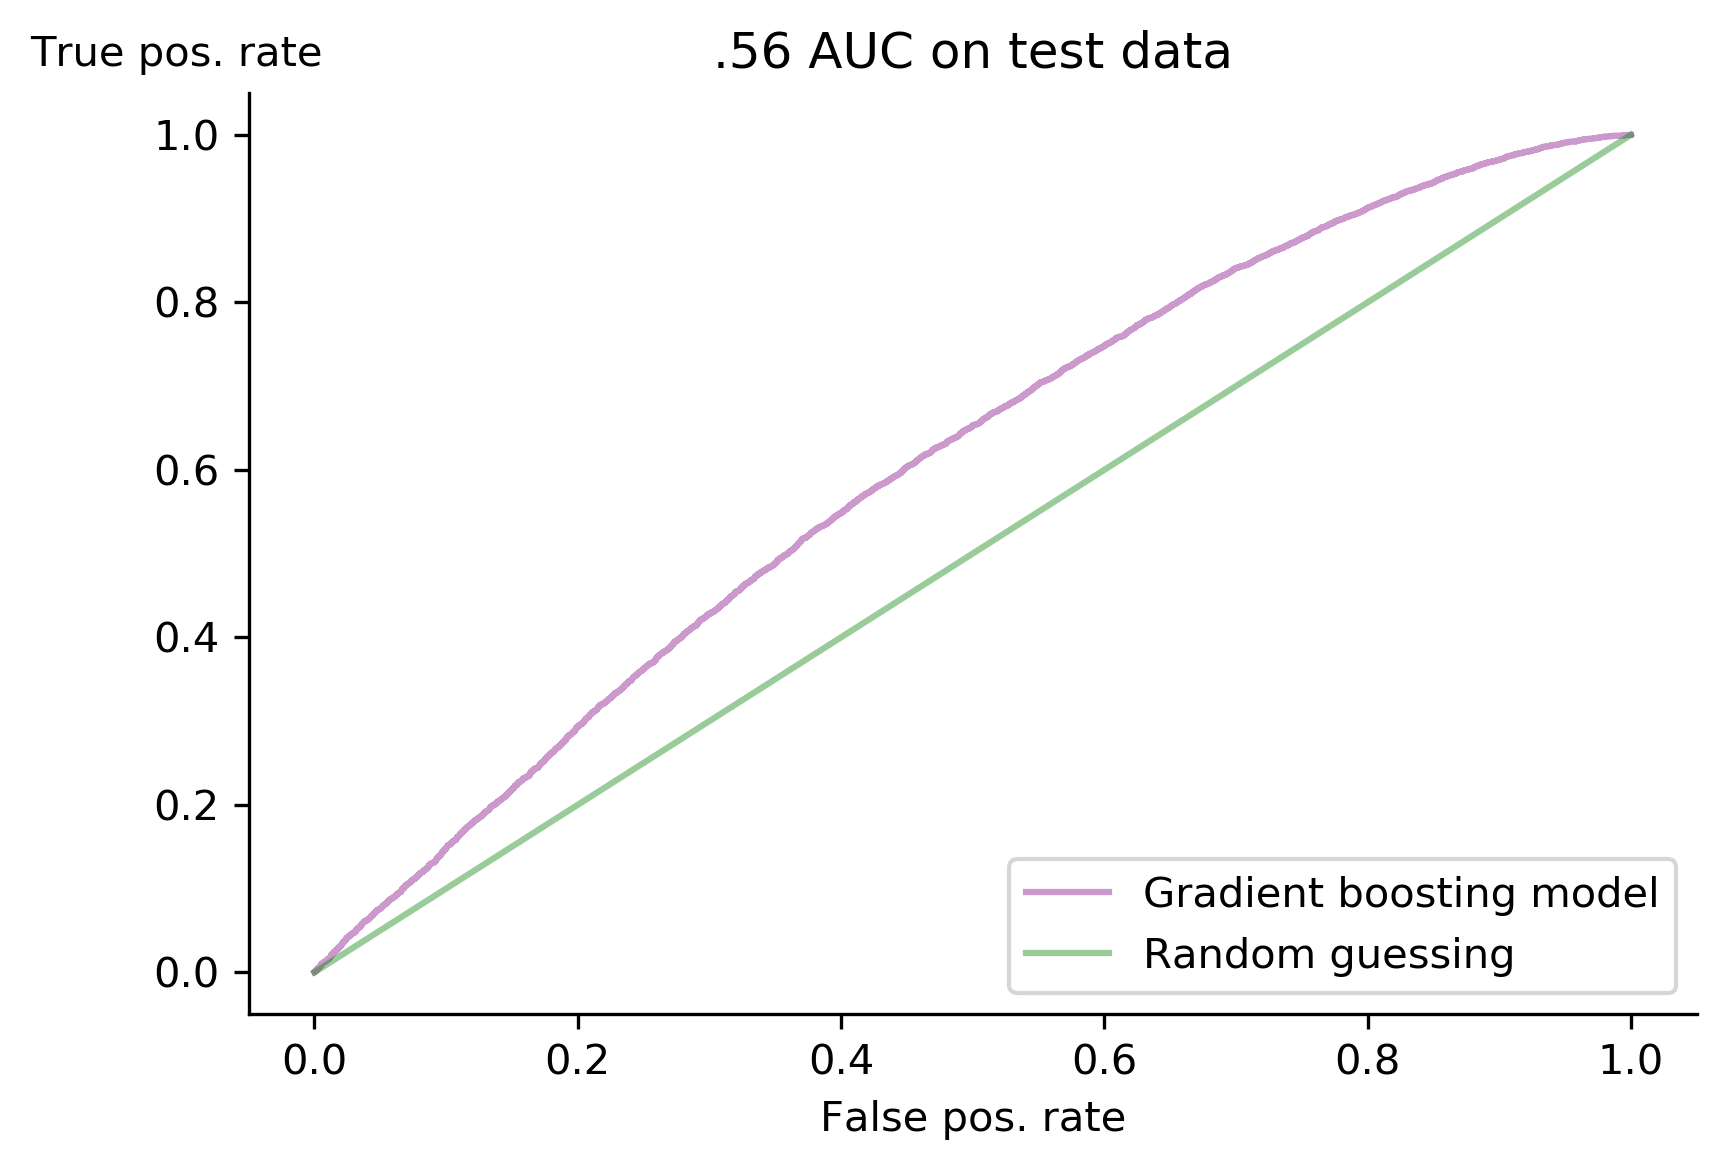

In [146]:
l = np.linspace(0, 1, 100)

plt.plot(fpr, tpr, color='purple', alpha=0.4, label='Gradient boosting model')
plt.plot([0, 1], [0,1], color='green', alpha=0.4, label='Random guessing')

plt.xlabel('False pos. rate', size=10)
plt.ylabel('True pos. rate', rotation=0)
plt.title('.56 AUC on test data')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_label_coords(-0.05,1.02)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc=4)